In [1]:
from pymc import Beta, Binomial, stochastic, Model
import numpy as np

# the data
trials = np.array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100])
successes = np.array([40, 44, 47, 54, 63, 46, 44, 49, 58, 50])

# hyperparameters
@stochastic(dtype=np.float64)
def hyperpriors(value=[1.0, 1.0]):
    a = value[0]
    b = value[1]
    if a <= 0 or b <= 0:
        return -np.inf
    else:
        return np.log(np.power((a + b), -2.5))

a = hyperpriors[0]
b = hyperpriors[1]

# the p_i, what we'd like to estimate
success_rates = Beta('success_rates', a, b, size=10)

# what we observed
observed_values = Binomial('observed_values', trials, success_rates, value=successes, observed=True)


In [2]:
import ctr_model

ctr_model.success_rates.parents

{'alpha': <pymc.CommonDeterministics.Index 'hyperpriors[0]' at 0x10429acd0>,
 'beta': <pymc.CommonDeterministics.Index 'hyperpriors[1]' at 0x10429a210>}

In [3]:
ctr_model.success_rates.children

{<pymc.distributions.Binomial 'observed_values' at 0x1042ac150>}

In [4]:
ctr_model.hyperpriors.children

{<pymc.CommonDeterministics.Index 'hyperpriors[0]' at 0x10429acd0>,
 <pymc.CommonDeterministics.Index 'hyperpriors[1]' at 0x10429a210>}

In [5]:
ctr_model.observed_values.parents

{'n': array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]),
 'p': <pymc.distributions.Beta 'success_rates' at 0x1042ac910>}

In [6]:
ctr_model.success_rates.value

array([ 0.12230275,  0.59300434,  0.6972255 ,  0.79553351,  0.82471505,
        0.94896163,  0.69187488,  0.30546014,  0.36664579,  0.53065588])

In [7]:
ctr_model.observed_values.value

array([40, 44, 47, 54, 63, 46, 44, 49, 58, 50])

In [8]:
ctr_model.a.value

1.0

In [9]:
ctr_model.b.value

1.0

In [10]:
from pymc import MCMC

M = MCMC(ctr_model)

M.sample(iter=1000000, burn=500000)

 [-----------------100%-----------------] 1000000 of 1000000 complete in 101.7 sec

In [11]:
M.trace(success_rates)[-10:]

array([[ 0.48052472,  0.44129665,  0.4602393 ,  0.51788941,  0.56718527,
         0.48101306,  0.54466724,  0.49002793,  0.5668004 ,  0.52551358],
       [ 0.47732863,  0.42249446,  0.50154238,  0.5109804 ,  0.53048356,
         0.49140116,  0.54776272,  0.49645121,  0.56933452,  0.51005515],
       [ 0.47999471,  0.43299227,  0.46681665,  0.50791968,  0.55989   ,
         0.51738099,  0.53595546,  0.49644799,  0.55620942,  0.50766148],
       [ 0.47999471,  0.43299227,  0.46681665,  0.50791968,  0.55989   ,
         0.51738099,  0.53595546,  0.49644799,  0.55620942,  0.50766148],
       [ 0.48249513,  0.44213237,  0.50563164,  0.50870072,  0.60106347,
         0.50496682,  0.49926038,  0.50132974,  0.54514174,  0.48916611],
       [ 0.48249513,  0.44213237,  0.50563164,  0.50870072,  0.60106347,
         0.50496682,  0.49926038,  0.50132974,  0.54514174,  0.48916611],
       [ 0.47679382,  0.43693968,  0.48082616,  0.51900678,  0.59363822,
         0.49110934,  0.49737611,  0.50966812

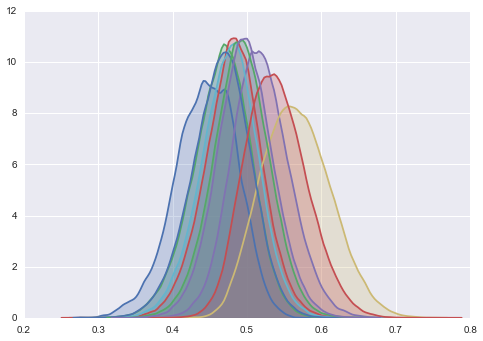

In [12]:
%matplotlib inline
import seaborn as sns

posteriors = []
for i in range(10):
    posteriors.append(M.trace(success_rates)[:][:,i]) # gets column i from all the rows

for posterior in posteriors:
    sns.kdeplot(posterior, shade=True)

In [14]:
ctr_model.a.value

58.208493454484696

In [15]:
ctr_model.b.value

55.894378047933131

In [19]:
M.success_rates.summary()


success_rates:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.445            0.041            0.002            [ 0.362  0.521]
	0.466            0.039            0.001            [ 0.388  0.541]
	0.482            0.038            0.0              [ 0.406  0.557]
	0.519            0.039            0.001            [ 0.446  0.598]
	0.567            0.046            0.001            [ 0.481  0.658]
	0.476            0.039            0.0              [ 0.398  0.551]
	0.466            0.039            0.001            [ 0.387  0.542]
	0.492            0.038            0.001            [ 0.417  0.568]
	0.539            0.041            0.001            [ 0.463  0.621]
	0.497            0.038            0.001            [ 0.421  0.571]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	